# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[ 8  1  4]
 [ 0 -1  2]
 [10 26  1]
 [29 34  4]
 [13  0  3]]
Simplices
 [[12 22 25]
 [ 6 12 25]
 [12  6 19]
 [ 0 12 18]
 [12  0 22]]
Points
 [[[0.38418514 0.33859918]
  [0.13993602 0.66778947]
  [0.01607468 0.29520419]]

 [[0.19836374 0.05166196]
  [0.38418514 0.33859918]
  [0.01607468 0.29520419]]

 [[0.38418514 0.33859918]
  [0.19836374 0.05166196]
  [0.41637364 0.13454863]]

 [[0.39398101 0.57544699]
  [0.38418514 0.33859918]
  [0.57335018 0.55192301]]

 [[0.38418514 0.33859918]
  [0.39398101 0.57544699]
  [0.13993602 0.66778947]]]


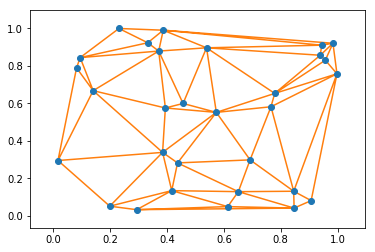

In [4]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

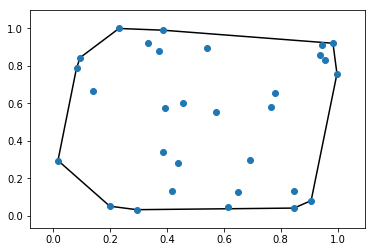

In [5]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

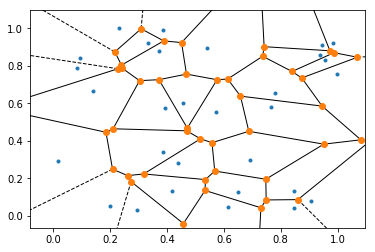

In [6]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [7]:
from scipy.spatial import KDTree, cKDTree

In [8]:
tree = cKDTree(points)

print (tree.data)

[[0.39398101 0.57544699]
 [0.37050768 0.87898688]
 [0.84558514 0.13130772]
 [0.77877595 0.65311143]
 [0.9390299  0.85668413]
 [0.09408804 0.8441248 ]
 [0.19836374 0.05166196]
 [0.61339544 0.04940757]
 [0.76563714 0.58194277]
 [0.08147643 0.78912612]
 [0.95695005 0.83022764]
 [0.45623124 0.599484  ]
 [0.38418514 0.33859918]
 [0.53887412 0.8963879 ]
 [0.98368333 0.92069223]
 [0.84697523 0.04154876]
 [0.23060486 0.9994515 ]
 [0.29294608 0.03299633]
 [0.57335018 0.55192301]
 [0.41637364 0.13454863]
 [0.43679554 0.28244694]
 [0.99785939 0.757763  ]
 [0.13993602 0.66778947]
 [0.65075143 0.12912535]
 [0.38646423 0.99027853]
 [0.01607468 0.29520419]
 [0.33198382 0.92330373]
 [0.94409945 0.91030167]
 [0.90695092 0.08139842]
 [0.69206582 0.29859207]]


In [19]:
%%timeit

tree.query((0.5,0.5))

36.5 µs ± 526 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [21]:
%%timeit

tree.query(test_points) 

794 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [23]:
%%timeit

KDTree(more_points)

34.9 ms ± 730 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit

big_tree.query(test_points) 

147 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently). 


In [13]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [14]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.015743967136248784, 4981)
(0.015743967136248784, 4981)


In [28]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

39.7 µs ± 314 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

35 µs ± 561 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [30]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))


785 µs ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

793 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
